<a href="https://colab.research.google.com/github/TheFox9711/MLPNS_LVolpi/blob/main/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import pylab as pl
import os
import json 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data

Data Dictionary (Dataset semantics) http://opendata.cern.ch/record/328


In [3]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
cd gdrive/My\ Drive/MLPNS2023/.kaggle

/content/gdrive/My Drive/MLPNS2023/.kaggle


In [5]:
ls -l *kaggle*

-rw------- 1 root root 66 Apr 13 15:12 kaggle.json


In [6]:
envs = json.load(open('kaggle.json', 'r'))
envs

{'username': 'thefox9711', 'key': '5dfadc61f6cd4ce1ad12c4a7add51b3f'}

In [7]:
os.environ['KAGGLE_USERNAME'] = envs['username']
os.environ['KAGGLE_KEY'] = envs['key']

In [8]:
!kaggle --version

Kaggle API 1.5.13


In [9]:
!kaggle datasets list -s higgs-boson

ref                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ryanholbrook/higgs-boson                        Higgs Boson                                      1GB  2020-10-02 23:04:26            456          8  0.375            
knight079/higgsb                                Higgs Boson Dataset                             57MB  2017-10-17 06:27:15            539          5  0.4117647        
mragpavank/higs-bonsons-and-background-process  Higgs bosons and a background process           11MB  2021-01-16 05:54:16            153         27  0.3529412        
ukveteran/higgs-boson-data                      Higgs Boson Data                                 1MB  2020-08-01 13:40:18             43          4  0.29411766      

In [10]:
#!mkdir higgs

In [11]:
cd higgs

/content/gdrive/My Drive/MLPNS2023/.kaggle/higgs


In [12]:
#!kaggle competitions download -c higgs-boson

In [13]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip	training.csv
higgs-boson.zip				 test.zip		training.zip


In [14]:
#!unzip higgs-boson.zip

In [15]:
#!unzip training.zip

In [16]:
higgsdata = pd.read_csv('training.csv')
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [17]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


Togliamo i dati mancanti, che qui non sono rappresentati da NaN ma da -999.

In [18]:
(higgsdata == -999).sum()  # Ho dei -999 al posto di NaN

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [19]:
higgsdata_clean = higgsdata.replace(-999, np.nan).dropna()
higgsdata_clean

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,...,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,b
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,...,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249976,349976,137.371,4.640,92.603,107.121,3.189,322.430,-2.384,2.149,2.755,...,2,85.132,1.991,-1.518,51.068,-1.197,-2.831,136.200,0.001503,s
249980,349980,119.934,20.078,88.751,35.227,0.660,111.491,1.836,2.800,18.532,...,2,69.219,-1.064,1.118,43.719,-1.725,-2.756,112.938,0.018636,s
249985,349985,126.151,29.023,95.258,152.684,1.000,163.066,-0.240,1.504,24.642,...,2,158.904,0.401,0.034,34.196,-0.599,-2.525,193.099,0.018636,s
249993,349993,130.075,3.918,66.781,77.369,0.936,322.296,-0.207,3.102,49.937,...,3,155.864,-0.358,1.093,134.344,0.578,-2.215,546.066,0.001503,s


<ipython-input-20-9946ae9a7890>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = pl.subplots(1, 2, figsize=(8,3))


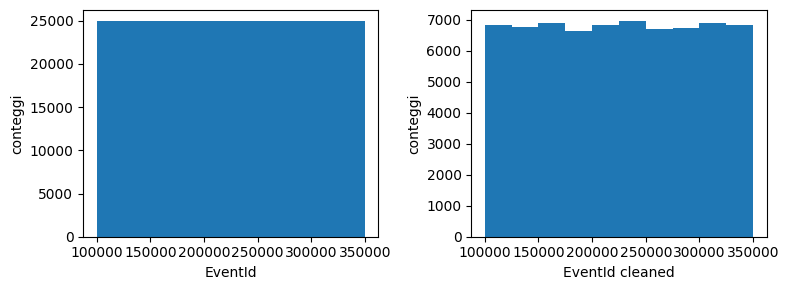

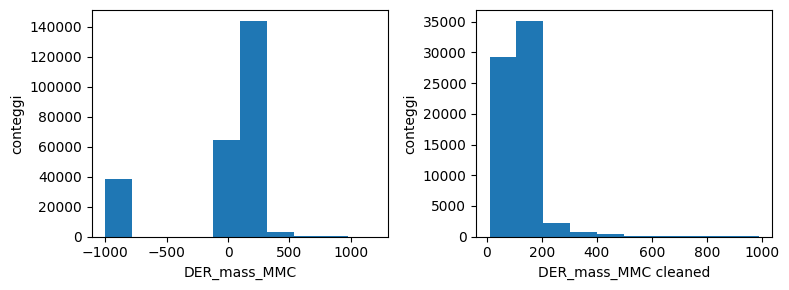

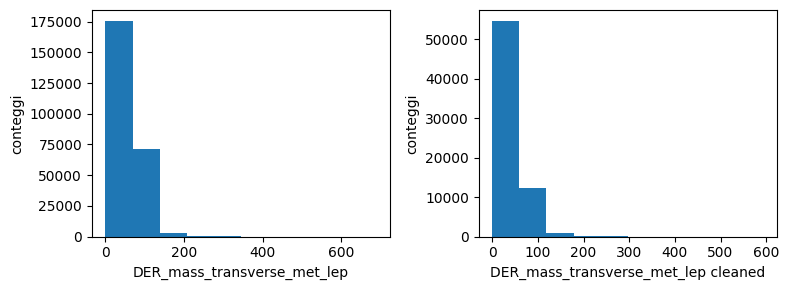

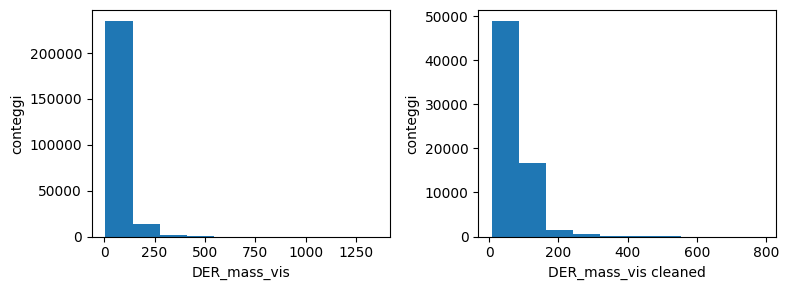

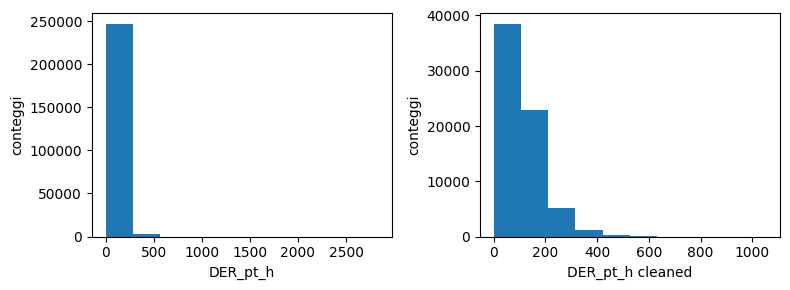

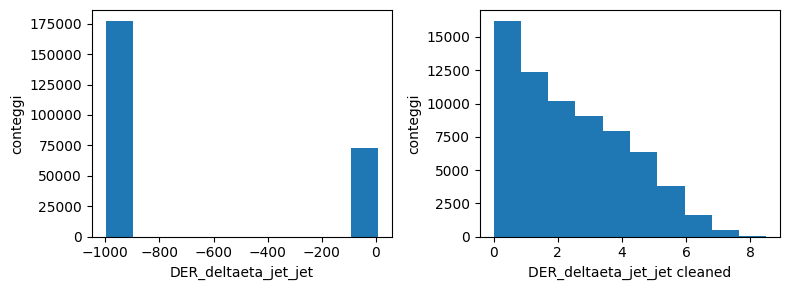

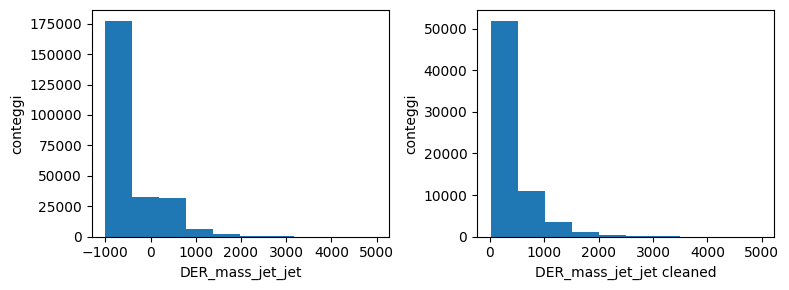

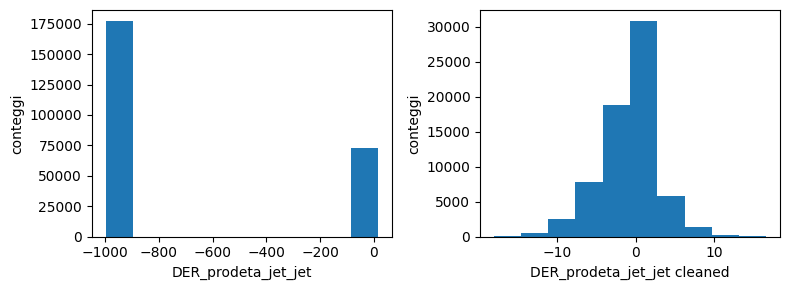

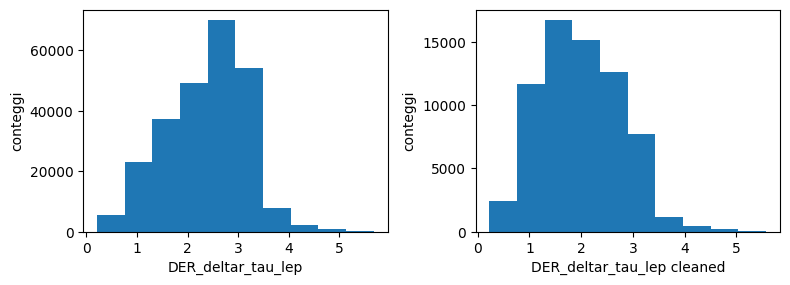

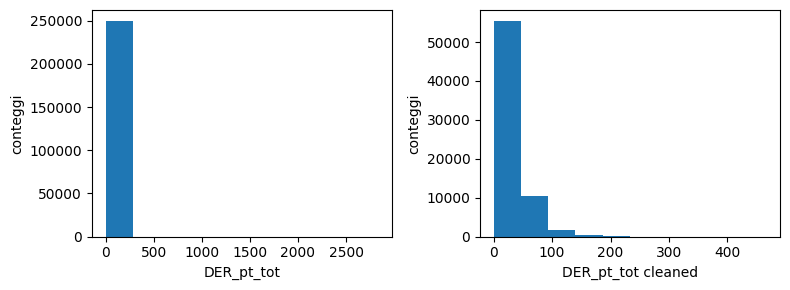

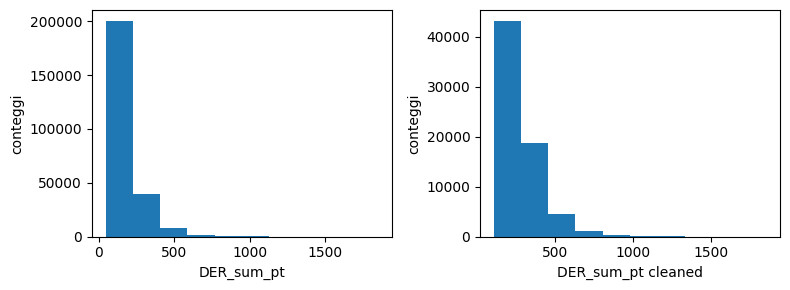

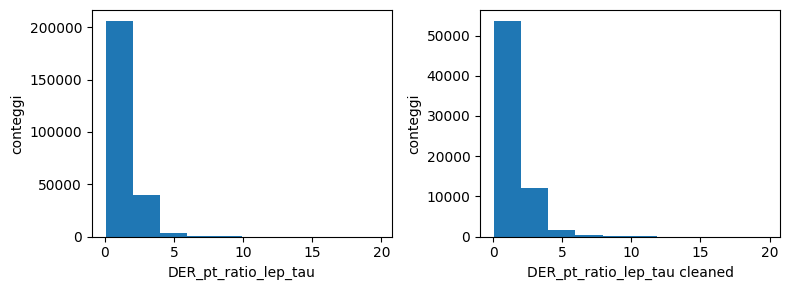

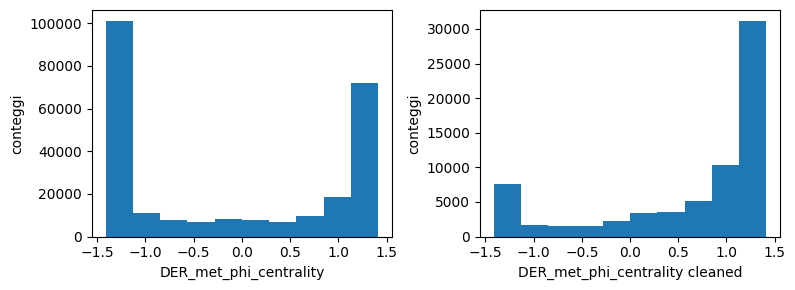

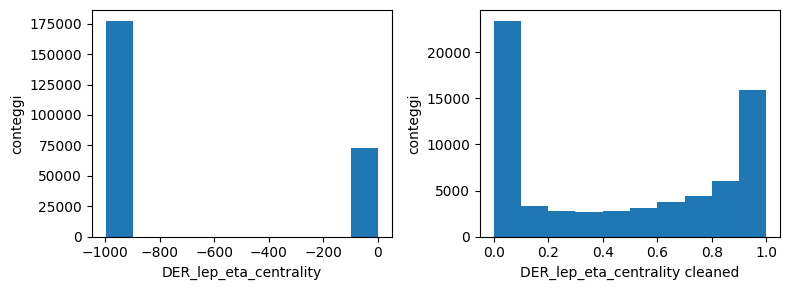

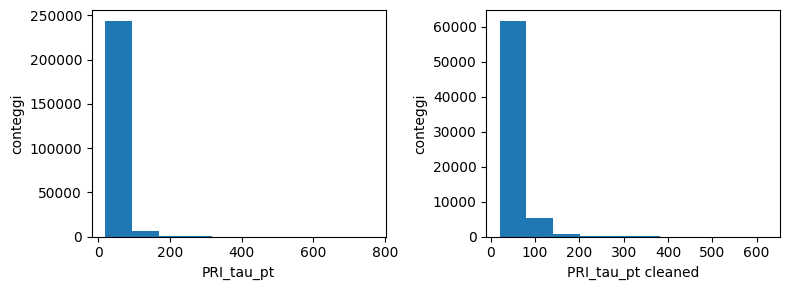

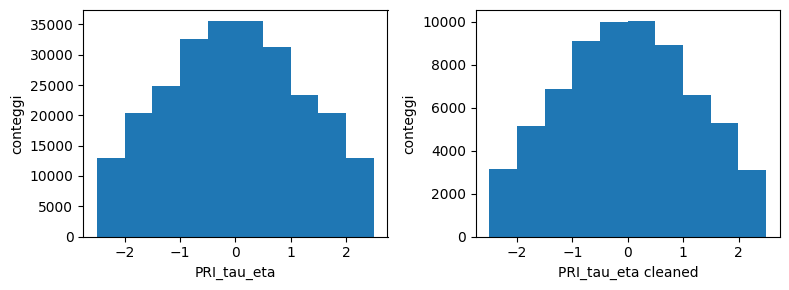

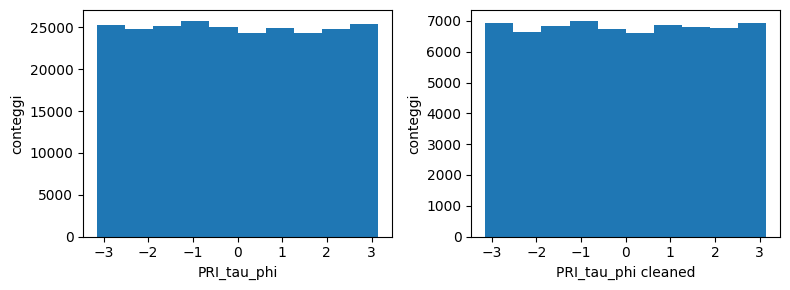

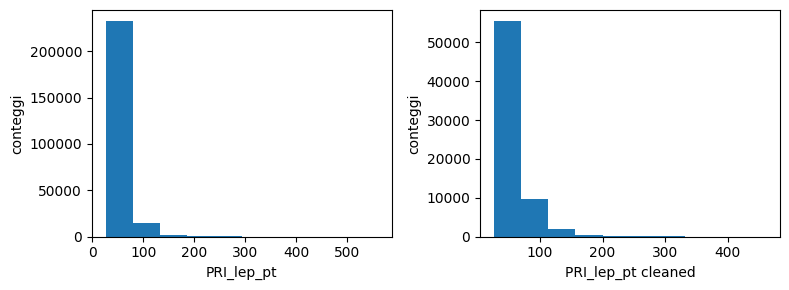

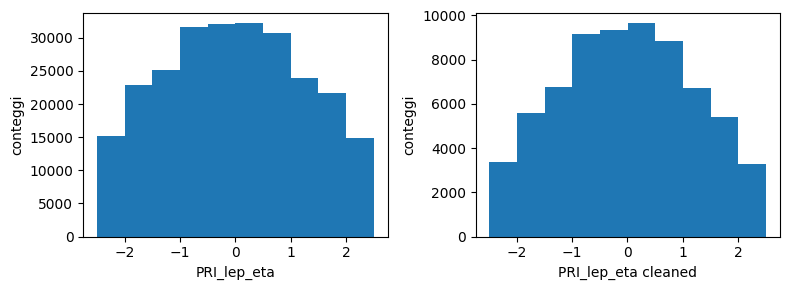

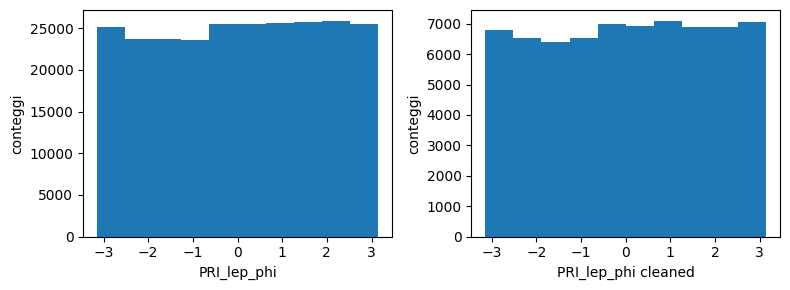

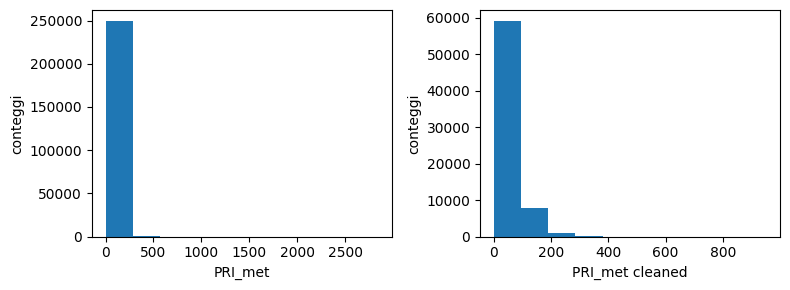

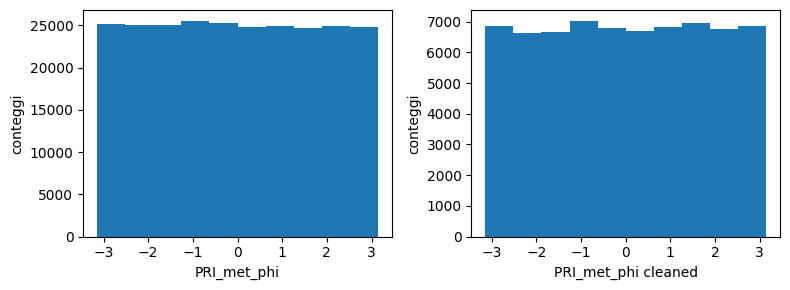

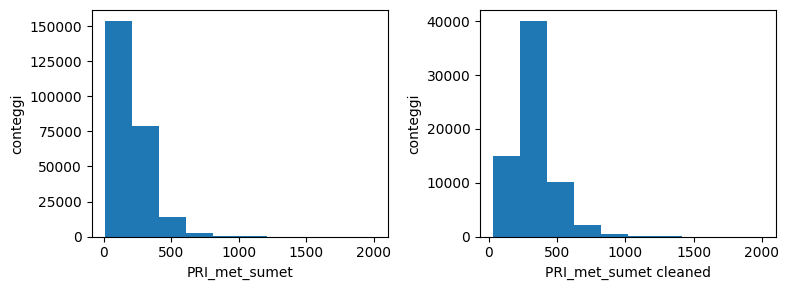

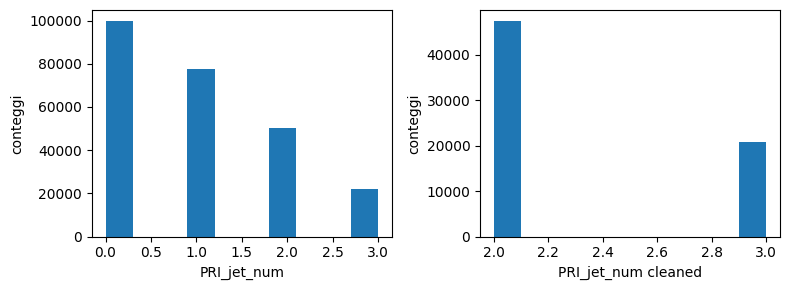

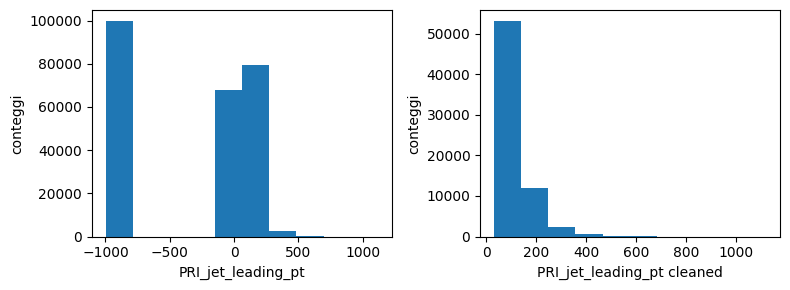

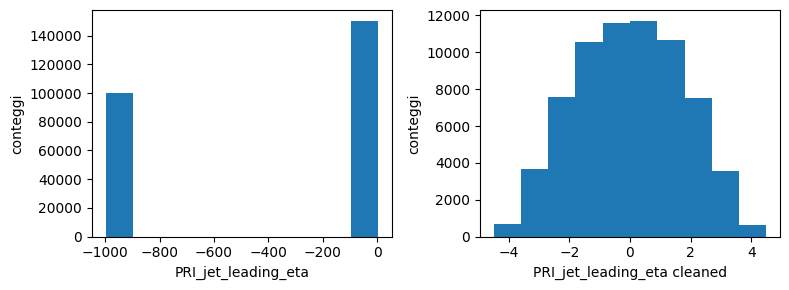

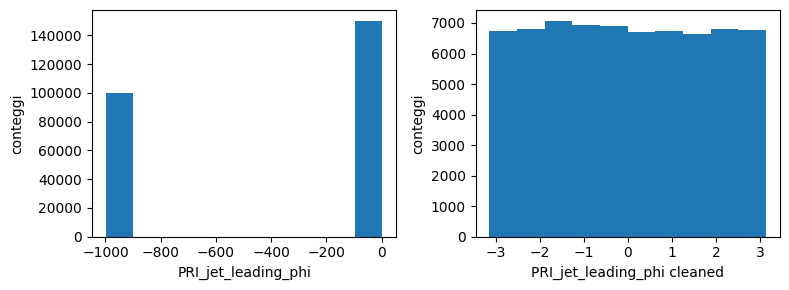

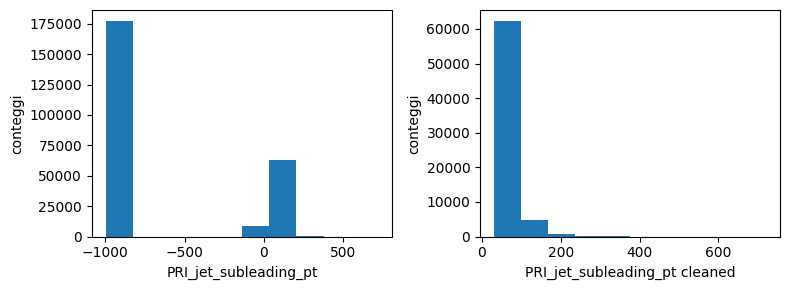

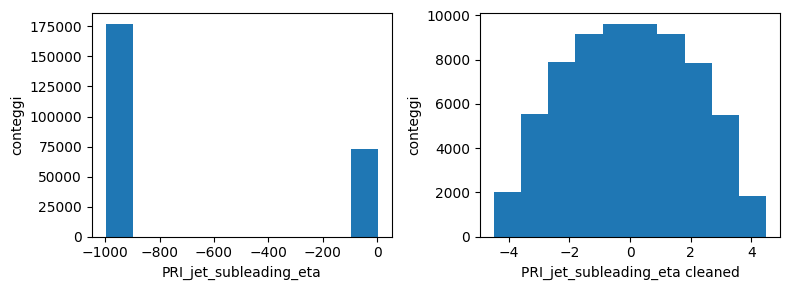

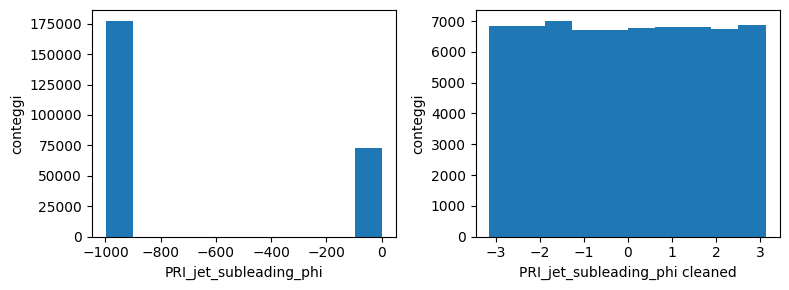

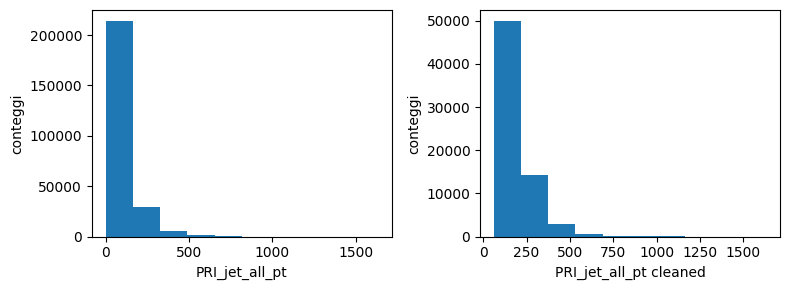

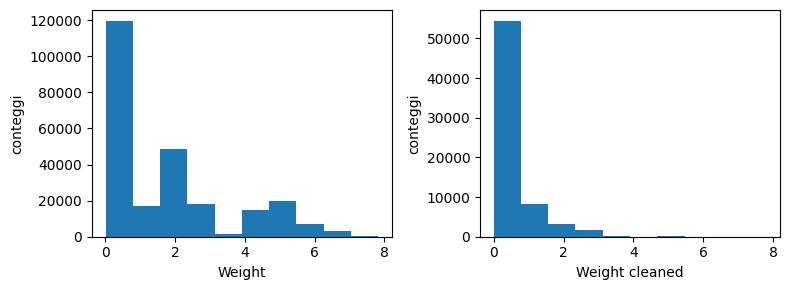

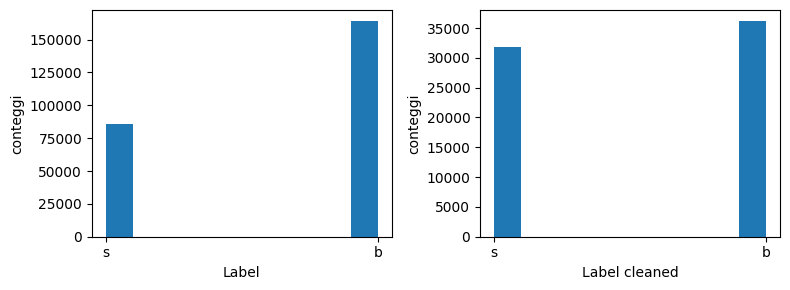

In [20]:
for c in higgsdata.columns:
  fig, ax = pl.subplots(1, 2, figsize=(8,3))

  ax[0].set_xlabel(c)
  ax[0].set_ylabel('conteggi')
  ax[0].hist(higgsdata[c].values)

  ax[1].set_xlabel(c + ' cleaned')
  ax[1].set_ylabel('conteggi')
  ax[1].hist(higgsdata_clean[c].values)

  plt.tight_layout()  # Per evitare overlapping dei labels

A questo punto eliminiamo i dati coi NaN:

In [21]:
higgsdata = higgsdata_clean

# Estrazione & preparazione dati

In [22]:
labels = higgsdata['Label'].values
labels

array(['s', 'b', 's', ..., 's', 's', 'b'], dtype=object)

In labels ho solo 'b' e 's':

In [23]:
np.unique(labels)

array(['b', 's'], dtype=object)

In [24]:
weights = higgsdata['Weight'].values
weights

array([0.00265331, 0.08341403, 0.00265331, ..., 0.01863612, 0.0015027 ,
       0.06406078])

Eliminiamo di conseguenza le colonne labels e weights ed anche l'id che non ci interessa.

In [25]:
higgsdata.drop(['EventId', 'Weight', 'Label'], axis=1, inplace=True)
higgsdata.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


# Train & Test

In [26]:
from sklearn.model_selection import train_test_split


# X_train e X_test li divido perché lo split avviene prima in base a Weight poi in base a Label
Xw_train, Xw_test, Yw_train, Yw_test = train_test_split(higgsdata.values, weights, random_state=302)
Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(higgsdata.values, labels, random_state=302)

# stratify: per avere la stessa frazione di dati in training e test

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


Generiamo degli alberi basati sui dati di training in 2 modi, in parallelo (RandomForestClassifier) e in serie (GradientBoostingClassifier, cioè un albero è generato prendendo il precedente e modificandolo leggermente (?)). Confrontiamo poi quale dei 2 modelli dà i risultati migliori, cioè prevede meglio i labels e i weights.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

In [44]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [29]:
gbt = GradientBoostingClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(gbt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Facciamo i fit per determinare i labels.

In [45]:
rf.fit(Xl_train, Yl_train);

In [ ]:
gbt.fit(Xl_train, Yl_train);

calculate the  scores for the training and test sets and evaluate  overtraining etc

Vediamo quanto bene i fit predicono i dati di test. Il punteggio valutato sui dati dovrebbe (?) essere 1, dato che gli alberi sono costruiti a partire da essi.

In [31]:
print('\033[1;34malgorithm\ttraining\ttesting\033[0m')
print('rf\t\t{0:.4f}\t\t{1:.4f}'.format(rf.score(Xl_train, Yl_train), rf.score(Xl_test, Yl_test)))
print('gbt\t\t{0:.4f}\t\t{1:.4f}'.format(gbt.score(Xl_train, Yl_train), gbt.score(Xl_test, Yl_test)))

algorithm	training	testing
rf		1.0000		0.8428
gbt		0.8477		0.8417


Gli alberi generati a caso (rf) danno una performance peggiore rispetto all'altro metodo. Forse perché non abbiamo impostato la max_depth quindi i nodi vanno troppo in profondità?

# Confusion matrix

- Produce a confusion matrix for each model and compare them


 



La matrice di confusione ha sulle righe i valori veri delle variabili scelte, sulle colonne quelli predetti dal modello. Se l'algoritmo è perfetto cioè predice correttamente tutti i valori otteniamo una matrice diagonale.

Dato che per i labels ho solo due valori ottengo matrici 2x2.

In [32]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """         
  if normalize:
    normalize = 'true'  # Per usarlo in confusion_matrix()
    title = title + ' Normalized confusion matrix'
  else:
    title = title + ' Confusion matrix, without normalization'

  # Compute confusion matrix
  cm = confusion_matrix(y_true, y_pred, normalize=normalize)

  # plot it
  fig, ax = plt.subplots(1, 1)
  fig.subplots_adjust()

  im = ax.imshow(cm, cmap=cmap)
  ax_divider = make_axes_locatable(ax)

  # Per comodità aggiungiamo i valori degli elementi di matrice
  pl.text(0, 0, "%f"%cm[0][0], ha="center")
  pl.text(1, 1, "%f"%cm[1][1], ha="center")
  pl.text(0, 1, "%f"%cm[1][0], color="w", ha="center")
  pl.text(1, 0, "%f"%cm[0][1], color="w", ha="center")

  # add an axes to the right of the main axes.
  pl.xticks([0, 1], labels=["N", "P"])
  pl.ylim(-0.5, 1.5)
  pl.yticks([0, 1], labels=["N", "P"])    
  pl.title(title)
  cax = ax_divider.append_axes("right", size="10%", pad="2%")
  cb = colorbar(im, cax=cax)

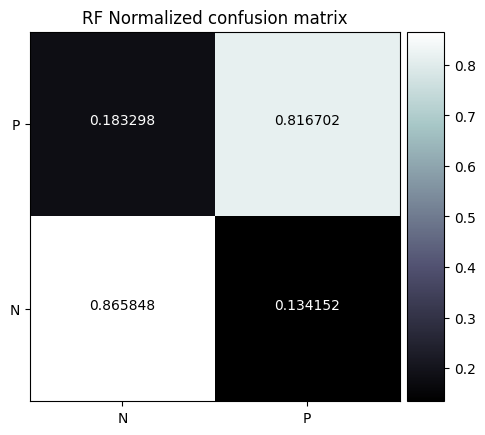

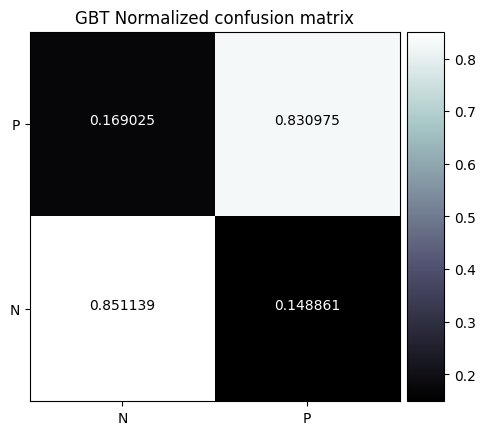

In [33]:
plot_confusion_matrix(Yl_test, rf.predict(Xl_test), normalize=True, title='RF')
plot_confusion_matrix(Yl_test, gbt.predict(Xl_test), normalize=True, title='GBT')

# Weights


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


Facciamo la stessa cosa per i pesi.

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfR = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
rfR.fit(Xw_train, Yw_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0)
gbtR.fit(Xw_train, Yw_train)

GradientBoostingRegressor(random_state=0)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [36]:
def l_norm(x, y, n=2):
  return np.sum(np.abs(x - y)**n)

In [37]:
print('\033[1;34malgorithm\tL1\t\tL2\033[0m')
print('rf\t\t{0:.0f}\t\t{1:.0f}'.format(l_norm(Yw_test, rfR.predict(Xw_test), n=1), l_norm(Yw_test, rfR.predict(Xw_test), n=2)))
print('gbt\t\t{0:.0f}\t\t{1:.0f}'.format(l_norm(Yw_test, gbtR.predict(Xw_test), n=1), l_norm(Yw_test, gbtR.predict(Xw_test), n=2)))

algorithm	L1		L2
rf		7105		6593
gbt		6024		5290


# Important features

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importances_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [63]:
best_features_index = np.argsort(rf.feature_importances_)[0:4]
higgsdata.iloc[:, best_features_index]

,PRI_jet_num,PRI_lep_phi,PRI_met_phi,PRI_jet_leading_phi
0,2,-2.414,-0.277,0.444
5,3,1.857,2.237,-0.653
6,2,-0.966,-1.443,1.450
11,3,2.502,2.148,0.303
23,2,-0.952,-0.973,1.416
...,...,...,...,...
249976,2,1.503,1.408,-1.518
249980,2,-1.558,1.116,1.118
249985,2,-3.050,-2.575,0.034
249993,3,-1.689,-1.768,1.093


In [67]:
# Ci servono solo i dati corrispondenti ai 4 parametri più importanti. Modifichiamo solo X, in Y ho solo i labels
Xl_train_4 = Xl_train[:, best_features_index]

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [54]:
random_grid = {
    'bootstrap':    [True, False],
    'max_depth':    [3, 10, None],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [10, 100]
}

print(random_grid)

{'n_estimators': [10, 100], 'max_depth': [3, 10, None], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']}


In [88]:
from sklearn.model_selection import RandomizedSearchCV


# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(
    estimator = rf, param_distributions=random_grid, n_iter=24, cv=3, random_state=222, verbose=4)  # iid=False ???

Praticamente devo cercare quale combinazione dei parametri in random_grid dà risultati migliori.

cv indica come suddividere i dati per fare cross validation, ovvero i dati vengono divisi in cv parti uguali e per ognuna di esse si esegue l'algoritmo; all'i-esima esecuzione si usano i dati dell'i-esimo cv-esimo per il training e i restanti cv-1 cv-esimi come test.

n_iter indica quante combinazioni dei parametri in random_grid vengono create, scegliendo un valore per ogni chiave del dizionario. Lo imposto a 24 perché ho 24 combinazioni possibili (sperando che l'algoritmo le provi tutte).

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [89]:
random_search.fit(Xl_train_4, Yl_train);

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=10;, score=0.580 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=10;, score=0.587 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=10;, score=0.584 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100;, score=0.578 total time=   2.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100;, score=0.582 total time=   3.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100;, score=0.601 total time=   2.5s
[CV 1/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.580 total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.587 total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.584 total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.578 total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.582 total time=   2.1s
[CV 3/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.601 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=10;, score=0.631 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=10;, score=0.638 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=10;, score=0.630 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100;, score=0.631 total time=   6.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100;, score=0.640 total time=   5.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100;, score=0.636 total time=   6.0s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.631 total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.638 total time=   0.7s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.630 total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.631 total time=   5.1s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.640 total time=   5.5s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.636 total time=   6.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=10;, score=0.587 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=10;, score=0.583 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=10;, score=0.585 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=100;, score=0.602 total time=  12.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=100;, score=0.595 total time=  15.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=100;, score=0.603 total time=  16.0s
[CV 1/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.587 total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.583 total time=   1.4s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.585 total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.602 total time=  15.3s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.595 total time=  17.2s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.603 total time=  15.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=10;, score=0.576 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=10;, score=0.582 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=10;, score=0.580 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=100;, score=0.576 total time=   2.9s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=100;, score=0.582 total time=   2.9s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=100;, score=0.607 total time=   5.0s
[CV 1/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.576 total time=   0.6s
[CV 2/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.582 total time=   0.5s
[CV 3/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.580 total time=   0.6s
[CV 1/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.576 total time=   3.4s
[CV 2/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.582 total time=   3.5s
[CV 3/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.607 total time=   2.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=10;, score=0.629 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=10;, score=0.634 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=10;, score=0.630 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=100;, score=0.631 total time=   9.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=100;, score=0.634 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=100;, score=0.633 total time=   8.3s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.629 total time=   1.8s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.634 total time=   1.9s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.630 total time=   1.9s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.631 total time=  10.1s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.634 total time=  10.7s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.633 total time=  10.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=10;, score=0.572 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=10;, score=0.572 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=10;, score=0.575 total time=   2.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=100;, score=0.581 total time=  23.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=100;, score=0.579 total time=  24.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=100;, score=0.586 total time=  16.0s
[CV 1/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.572 total time=   2.4s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.572 total time=   2.0s
[CV 3/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.575 total time=   1.5s
[CV 1/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.581 total time=  16.8s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.579 total time=  18.4s
[CV 3/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.586 total time=  16.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [93]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best score is 0.6359793434865098


In [94]:
df = pd.DataFrame(random_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223372,0.003859,0.045281,0.001972,10,auto,3,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.579600,0.586505,0.584156,0.583420,0.002867,17
1,2.384605,0.333203,0.169417,0.025518,100,auto,3,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.578484,0.581513,0.601010,0.587002,0.009982,13
2,0.223953,0.002835,0.041198,0.001672,10,sqrt,3,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.579600,0.586505,0.584156,0.583420,0.002867,17
3,1.921515,0.008617,0.127859,0.003007,100,sqrt,3,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.578484,0.581513,0.601010,0.587002,0.009982,13
4,0.526326,0.012844,0.048536,0.001085,10,auto,10,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.631041,0.637773,0.629904,0.632906,0.003473,5
5,5.624995,0.556075,0.234687,0.040421,100,auto,10,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.631217,0.640416,0.636305,0.635979,0.003762,1
6,0.661271,0.100976,0.059168,0.015782,10,sqrt,10,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.631041,0.637773,0.629904,0.632906,0.003473,5
7,5.311406,0.370574,0.233647,0.027653,100,sqrt,10,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.631217,0.640416,0.636305,0.635979,0.003762,1
8,1.032042,0.037602,0.081389,0.000876,10,auto,None,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.587410,0.582981,0.585330,0.585240,0.001809,15
9,13.861107,1.394278,0.627124,0.140878,100,auto,None,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.601973,0.595137,0.602537,0.599883,0.003363,9


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
